In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#This is to define the model object, fit the model to the data and make predictions with the model.
#The model is: real GDP percapita growth rate (Y) = f(MRI) [ Y = aX + b + e (e = prediction error)]
#They are also calculated the mean squared error (MSE), the correlation coefficient and the Rsquared.
#It is used the predict function to calculate predicted values.
#VALIDATION: In order to quantify our model against new input values, we often split the data into training and testing data. 
#The model is then fit to the training data and scored by the test data. 
#Sklean pre-processing provides a library for automatically splitting up the data into training and testing.
#It is used the Durbin-Watson test for serial correlation (autocorrelation) test.
#It is shown the model fit by plotting the predicted values against the original data

#All this can be performed for each of the Latin American economies: 15 countries
#Each country has around 40 years of data
#All dataset were provided by the International Monetary Fund
# https://www.imf.org/external/pubs/ft/weo/2019/01/weodata/weoselagr.aspx

#Macroeconomic Result Index (MRI) is an Index developed by Jose Ignacio Diaz Rettali

#Analysis for 15 Latin American economies based on the Macroeconomic Result Index (MRI)
# MRI = (real GDP rate / (inflation rate / unemployment rate)) * 1000
# In order to demonstrate the strong relationship between the MRI and real GDP percapita rate,
# it is calcualted the R-squared for these variables to each country, and it is also
# needed to show the distribution around the mean R-squared
#The R-squared is calculated between the MRI and the real GDP percapita rate

Data1 = "data/bolivia.csv"
Data2 = "data/brazil.csv"
Data3 = "data/chile.csv"
Data4 = "data/colombia.csv"
Data5 = "data/ecuador.csv"
Data6 = "data/mexico.csv"
Data7 = "data/paraguay.csv"
Data8 = "data/peru.csv"
Data9 = "data/uruguay.csv"
Data10 = "data/venezuela.csv"
Data11 = "data/argentina.csv"
Data12 = "data/costarica.csv"
Data13 = "data/elsalvador.csv"
Data14 = "data/nicaragua.csv"
Data15 = "data/panama.csv"

dataW1 = pd.read_csv(Data1)
dataW2 = pd.read_csv(Data2)
dataW3 = pd.read_csv(Data3)
dataW4 = pd.read_csv(Data4)
dataW5 = pd.read_csv(Data5)
dataW6 = pd.read_csv(Data6)
dataW7 = pd.read_csv(Data7)
dataW8 = pd.read_csv(Data8)
dataW9 = pd.read_csv(Data9)
dataW10 = pd.read_csv(Data10)
dataW11 = pd.read_csv(Data11)
dataW12 = pd.read_csv(Data12)
dataW13 = pd.read_csv(Data13)
dataW14 = pd.read_csv(Data14)
dataW15 = pd.read_csv(Data15)

countries = ['Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Mexico', 'Paraguay', 'Peru', 'Uruguay',
             'Venezuela', 'Argentina', 'Costa Rica', 'El Salvador', 'Nicaragua', 'Panama']
dfrs = pd.DataFrame(countries, columns = ["Countries"])

#dfrs


In [2]:
#calculating the Macroeconomic Result Index (MRI)
#The number in dataW## identify the country to analyze, examples: dataW1 = Bolivia or dataW15 = Panama

dataT = dataW12

dataT['mri'] = (dataT["gdprate"] / (dataT["infrate"] + dataT["unemprate"])) * 1000
#print(dataT)

dataT.head()


,year,gdprate,infrate,unemprate,gdppcrate,mri
0,1981,-2.260,36.806,8.766,-5.150,-49.591855
1,1982,-7.285,90.271,9.405,-9.984,-73.086801
2,1983,2.859,32.503,9.231,-0.058,68.505295
3,1984,8.028,12.013,5.361,4.967,462.069759
4,1985,0.722,15.129,6.846,-2.231,32.855518


In [3]:
#Regression results for a simple linear regression

from sklearn import linear_model
import statsmodels.api as sm

x = dataT['mri']
y = dataT['gdppcrate']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdppcrate   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           1.94e-13
Time:                        09:05:44   Log-Likelihood:                -75.673
No. Observations:                  41   AIC:                             155.3
Df Residuals:                      39   BIC:                             158.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1161      0.418     -5.060      0.000      -2.962      -1.270
mri            0.0165      0.002     10.930      0.000       0.013       0.020
==============================================================================
Omnibus:                       32.101   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.257
Skew:                          -1.812   Prob(JB):                     1.03e-22
Kurtosis:                       9.792   Cond. No.                         473.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Estimated line equation

(slope, intercept, rvalue, pvalue, stderr) = linregress(dataT["mri"], dataT["gdppcrate"])
regressValues = dataT["mri"]* slope + intercept
lineEq = f"y = {round(slope, 5)} x + {round(intercept, 4)}   rvalue = {round(rvalue, 2)}  stderr = {round(stderr, 5)}"
print(lineEq)


y = 0.01647 x + -2.1161   rvalue = 0.87  stderr = 0.00151


In [5]:
#Predicted values and prediction errors

dfPAE = pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]
dfPAE.head()


,Predicted,Actual,Error
0,-2.932908,-5.150,2.217092
1,-3.319877,-9.984,6.664123
2,-0.987812,-0.058,-0.929812
3,5.494316,4.967,0.527316
4,-1.574975,-2.231,0.656025


In [6]:
#export to excel

#pd.DataFrame(dfPAE).to_excel('mripredictLA.xlsx', index=False)


In [6]:
#Calculate predicted values
# N = 0 ; for the first year in dataset

N = 3

print(f"True output: {round(y[N], 4)}")
print(f"Predicted output: {round(predictions[N], 4)}")
print(f"Prediction Error: {round(predictions[N]-y[N], 4)}")


True output: 4.967
Predicted output: 5.4943
Prediction Error: 0.5273


In [7]:
# Score the prediction with mse and r2

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error (MSE): {round(mse, 4)}")
print(f"R-squared (R2 ): {round(r2, 4)}")


Mean Squared Error (MSE): 2.3478
R-squared (R2 ): 0.7539


In [8]:
#VALIDATION: In order to quantify our model against new input values, we often split the data into training and testing data. 
#The model is then fit to the training data and scored by the test data. 
#Sklearn pre-processing provides a library for automatically splitting up the data into training and testing

from sklearn.linear_model import LinearRegression

# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = dataT.mri.values.reshape(-1, 1)
y = dataT.gdppcrate.values.reshape(-1, 1)

print("Shape:", X.shape, y.shape)
#X
#y


Shape: (41, 1) (41, 1)


In [9]:
# Create a linear model

model = LinearRegression()


In [10]:
# Fit (Train) our model to the data

model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [12]:
#Train the model using the training data

model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#And score the model using the unseen testing data

ScoreT = model.score(X_test, y_test)
print(f"Overall score (testing data) = {round(ScoreT, 4)}")


Overall score (testing data) = 0.7992


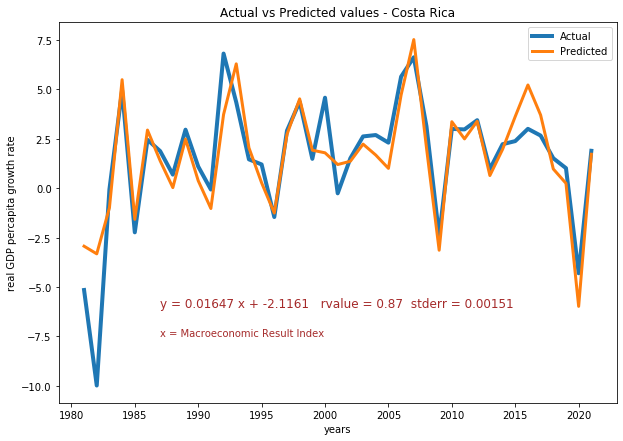

In [14]:
#This is to show the model fit by plotting the predicted values against the original data.

plt.figure(figsize = (10,7))

x1 = dataT['year']
y1 = dfPAE['Actual']
plt.plot(x1, y1, label = "Actual", linewidth = 4)
x2 = dataT['year']
y2 = dfPAE['Predicted']
plt.plot(x2, y2, label = "Predicted", linewidth = 3)
plt.xlabel('years')
plt.ylabel('real GDP percapita growth rate')
plt.title('Actual vs Predicted values - Costa Rica')
plt.legend()
plt.annotate(lineEq,(1987,-6), color = "brown", fontsize=12)
plt.annotate('x = Macroeconomic Result Index',(1987,-7.5), color = "brown", fontsize=10)
plt.show()


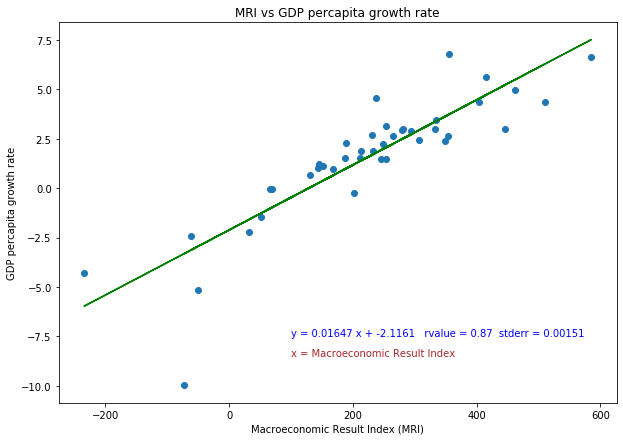

In [20]:
#This is to show the model fit by plotting the GDP percapita growth rate vs MRI using the estimated model.

(slope, intercept, rvalue, pvalue, stderr) = linregress(dataT["mri"], dataT["gdppcrate"])
regressValues = dataT["mri"]* slope + intercept
lineEq = f"y = {round(slope, 5)} x + {round(intercept, 4)}   rvalue = {round(rvalue, 2)}  stderr = {round(stderr, 5)}"

plt.figure(figsize = (10,7))

plt.scatter(dataT["mri"], dataT["gdppcrate"])
plt.plot(dataT["mri"], regressValues, color = "green")
plt.annotate(lineEq,(100,-7.5), color = "blue", fontsize=10)
plt.annotate('x = Macroeconomic Result Index',(100,-8.5), color = "brown", fontsize=10)
plt.xlabel("Macroeconomic Result Index (MRI)")
plt.ylabel("GDP percapita growth rate")
plt.title("MRI vs GDP percapita growth rate")

plt.show()
